## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

Location        Country Aircraft.damage              Make     Model  \
0       ID  United States       Destroyed           Stinson     108-3   
1       CA  United States       Destroyed             Piper  Pa24-180   
2       VA  United States       Destroyed            Cessna      172M   
3       CA  United States       Destroyed          Rockwell       112   
4       MA  United States     Substantial  Mcdonnel Douglas       Dc9   

   Number.of.Engines    Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
0                1.0  Reciprocating          Personal                   2.0   
1                1.0  Reciprocating          Personal                   4.0   
2                1.0  Reciprocating          Personal                   3.0   
3                1.0  Reciprocating          Personal                   2.0   
4                2.0      Turbo Fan           Unknown                   0.0   

   Total.Serious.Injuries  ...                       Weather.Condition  \
0                     0.0  ...                                 Unknown   
1                     0.0  ...                                 Unknown   
2                     0.0  ...  Instrumental Meteorological Conditions   
3                     0.0  ...  Instrumental Meteorological Conditions   
4                     0.0  ...        Visual Meteorological Conditions   

   Total.Passengers Total.Injured  Percent.Injured  Percent.Uninjured  \
0               2.0           2.0       100.000000           0.000000   
1               4.0           4.0       100.000000           0.000000   
2               3.0           3.0       100.000000           0.000000   
3               2.0           2.0       100.000000           0.000000   
4              45.0           1.0         2.222222          97.777778   

   Percent.Died  Airplane.Type  Event.Day Event.Month  Event.Year  
0         100.0        Private         24          10        1948  
1         100.0        Private         19           7        1962  
2         100.0        Private         30           8        1974  
3         100.0        Private         19           6        1977  
4           0.0        Private         17           9        1979  

[5 rows x 22 columns]

## Visualize KPIs

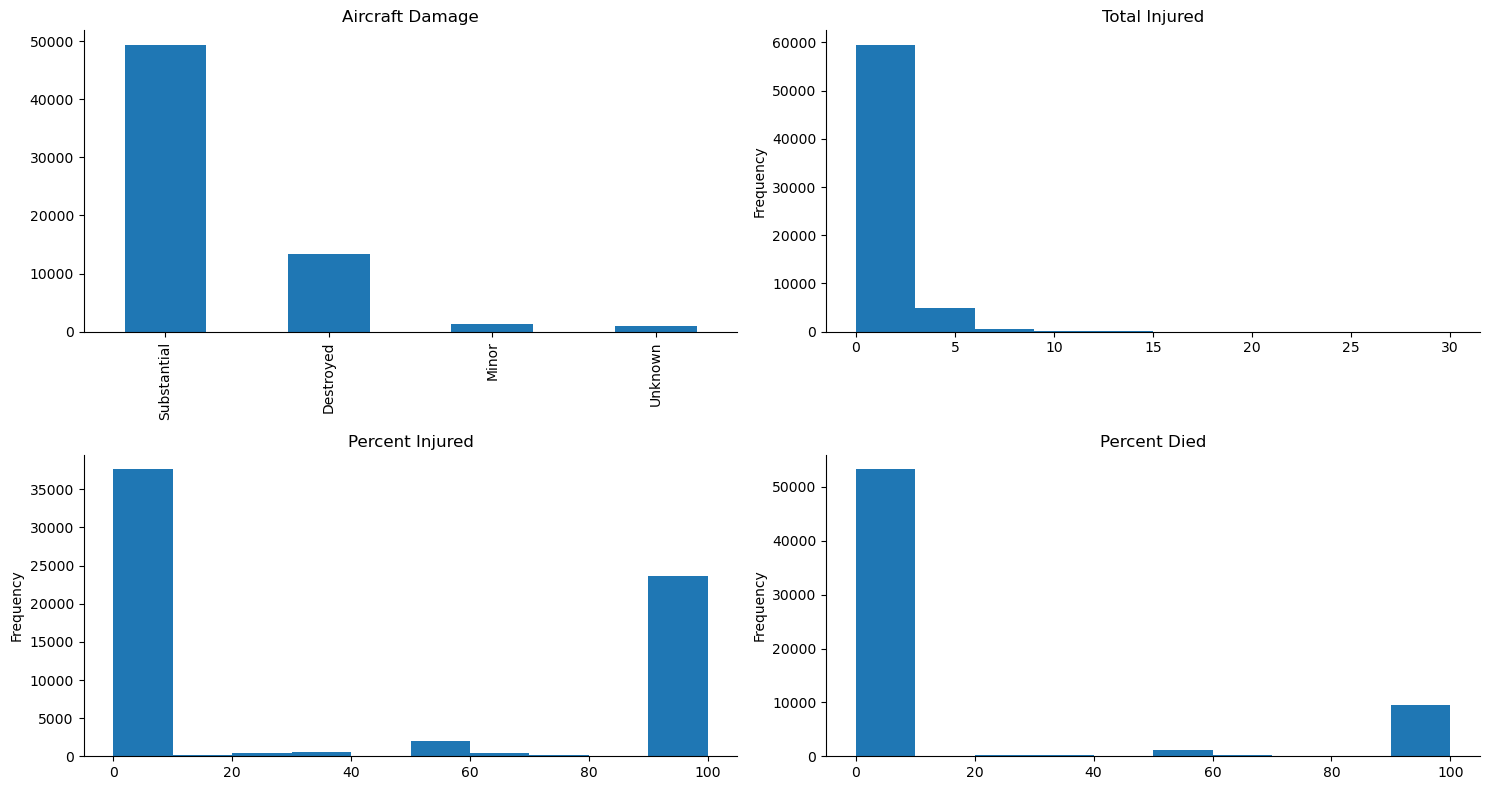

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
popular_makes = df['Make'].value_counts()
popular_makes = list(popular_makes[popular_makes > 100].index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca', 'Robinson', 'Hughes', 'Air Tractor', 'Boeing', 'Aeronca', 'Schweizer', 'Maule', 'Champion', 'Mcdonnel Douglas', 'Stinson', 'Luscombe', 'Aero Commander', 'De Havilland', 'Taylorcraft', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Cirrus Design Corp', 'Enstrom', 'Robinson Helicopter', 'Grumman American', 'Ayres', 'Eurocopter', 'Robinson Helicopter Company', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Embraer', 'Lake', 'Waco', 'Fairchild', 'Aviat', 'Mitsubishi', 'GrummanSchweizer', 'Airbus', 'Socata', 'Ryan', 'Helio', 'Cirrus', 'Learjet']


## Damage Index

In [6]:
# Assign randomized values to unknown damaged indices based on percentage in dataset
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage

In [7]:
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    #damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = adj_df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [8]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index').head(10)

Damage_Index  Num_Incidents  Uninjured_P  Injured_P     Died_P  \
Boeing           2.064782          849.0    62.468668  20.805772   6.407597   
Cessna           2.358731        26092.0    64.264303  35.616887  14.190254   
Robinson         2.368056         1008.0    57.630622  41.972553  18.715278   
Piper            2.438955        14350.0    58.748910  41.167466  18.578451   
Bellanca         2.439453         1024.0    55.102539  44.897461  18.953451   
Bell             2.479719         2416.0    52.591073  46.995019  14.626752   
Grumman          2.497387         1148.0    66.202872  33.797128   9.503444   
Air Tractor      2.350348          862.0    59.416087  40.583913  14.365816   
Mooney           2.531323         1293.0    48.337200  51.508121  26.029905   
Hughes           2.387316          883.0    57.835032  42.051718  10.349188   

              Penalty  Adj_Damage_Index  
Boeing       1.081848          2.233780  
Cessna       1.000000          2.358731  
Robinson     1.000000          2.368056  
Piper        1.000000          2.438955  
Bellanca     1.000000          2.439453  
Bell         1.000000          2.479719  
Grumman      1.000000          2.497387  
Air Tractor  1.074250          2.524861  
Mooney       1.000000          2.531323  
Hughes       1.062215          2.535843

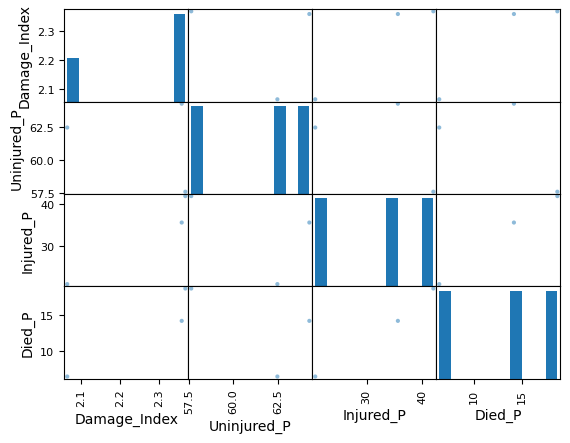

In [24]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [10]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')[:5]
di_df

Damage_Index  Num_Incidents  Uninjured_P  Injured_P     Died_P  \
Boeing        2.064782          849.0    62.468668  20.805772   6.407597   
Cessna        2.358731        26092.0    64.264303  35.616887  14.190254   
Robinson      2.368056         1008.0    57.630622  41.972553  18.715278   

           Penalty  Adj_Damage_Index  
Boeing    1.081848          2.233780  
Cessna    1.000000          2.358731  
Robinson  1.000000          2.368056

In [11]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]


In [25]:
model_performance 

Model
&Gcbc   NaN
0-1A    NaN
0-47B   NaN
0-58A   NaN
0-58B   NaN
         ..
Ymf5    NaN
Yms     NaN
Yoc     NaN
Ypf-7   NaN
Zkc-5   NaN
Name: count, Length: 4666, dtype: float64

In [12]:
model_performance =  ((best_dest['Model'].value_counts() + best_subs['Model'].value_counts() + best_minor['Model'].value_counts())/df['Model'].value_counts())
model_vc = df['Model'].value_counts()
model_pwdc = pd.concat({'Performance': model_performance, 'Amount of incidents': model_vc}, axis=1)
model_pwdc.sort_values(by='Performance', ascending = True)

Performance  Amount of incidents
Model                                      
767           0.285714                   14
E18S          0.292308                   65
Pa-60-600     0.307692                   13
P206A         0.333333                    9
E90           0.333333                   12
...                ...                  ...
Ymf5               NaN                    2
Yms                NaN                    1
Yoc                NaN                    1
Ypf-7              NaN                    2
Zkc-5              NaN                    1

[4666 rows x 2 columns]

In [13]:
model_pwdc = model_pwdc.loc[model_pwdc['Amount of incidents'] >= 20]
model_pwdc.sort_values(by='Performance', ascending = False)

Performance  Amount of incidents
Model                                     
At-401       0.933333                   75
At-502B      0.900000                   70
172R         0.874251                  167
172S         0.864499                  369
R22 Beta     0.853933                  267
...               ...                  ...
Uh-1B             NaN                   52
Uh-1H             NaN                   32
Upf-7             NaN                   45
V35A              NaN                   38
V35B              NaN                  149

[510 rows x 2 columns]

In [14]:
joint = df.join(model_pwdc, how = 'outer', on = 'Model').dropna()
joint

Location          Country Aircraft.damage     Make  \
0                            ID    United States       Destroyed  Stinson   
1087                         KY    United States     Substantial  Stinson   
1438                         WA    United States       Destroyed  Stinson   
2767                         WA    United States       Destroyed  Stinson   
3991                         WY    United States     Substantial  Stinson   
...                         ...              ...             ...      ...   
62493  Unknown/Foreign Location    United States       Destroyed    Piper   
62747                        NC    United States     Substantial    Piper   
62886                        PR    United States     Substantial    Piper   
63347                        FL    United States     Substantial    Piper   
64290  Unknown/Foreign Location  Foreign Country     Substantial    Piper   

       Model  Number.of.Engines    Engine.Type Purpose.of.flight  \
0      108-3                1.0  Reciprocating          Personal   
1087   108-3                1.0  Reciprocating          Personal   
1438   108-3                1.0  Reciprocating          Personal   
2767   108-3                1.0  Reciprocating          Personal   
3991   108-3                1.0  Reciprocating          Personal   
...      ...                ...            ...               ...   
62493   Pa23                2.0        Unknown          Personal   
62747   Pa23                2.0  Reciprocating     Instructional   
62886   Pa23                2.0  Reciprocating       Flight Test   
63347   Pa23                2.0  Reciprocating          Personal   
64290   Pa23                2.0        Unknown           Unknown   

       Total.Fatal.Injuries  Total.Serious.Injuries  ...  Total.Injured  \
0                       2.0                     0.0  ...            2.0   
1087                    0.0                     0.0  ...            2.0   
1438                    0.0                     2.0  ...            2.0   
2767                    2.0                     0.0  ...            2.0   
3991                    0.0                     0.0  ...            0.0   
...                     ...                     ...  ...            ...   
62493                   1.0                     0.0  ...            1.0   
62747                   0.0                     0.0  ...            0.0   
62886                   2.0                     0.0  ...            3.0   
63347                   0.0                     0.0  ...            0.0   
64290                   0.0                     0.0  ...            0.0   

       Percent.Injured Percent.Uninjured  Percent.Died  Airplane.Type  \
0                100.0               0.0    100.000000        Private   
1087             100.0               0.0      0.000000        Private   
1438             100.0               0.0      0.000000        Private   
2767             100.0               0.0    100.000000        Private   
3991               0.0             100.0      0.000000        Private   
...                ...               ...           ...            ...   
62493            100.0               0.0    100.000000        Private   
62747              0.0             100.0      0.000000        Private   
62886            100.0               0.0     66.666667        Private   
63347              0.0             100.0      0.000000        Private   
64290              0.0               0.0      0.000000        Private   

       Event.Day  Event.Month  Event.Year Performance  Amount of incidents  
0             24           10        1948    0.742268                 97.0  
1087          18            5        1982    0.742268                 97.0  
1438          23            6        1982    0.742268                 97.0  
2767          13           11        1982    0.742268                 97.0  
3991          15            5        1983    0.742268                 97.0  
...          ...          ...         ...

In [15]:
#joint.groupby('Model').mean(numeric_only=True)

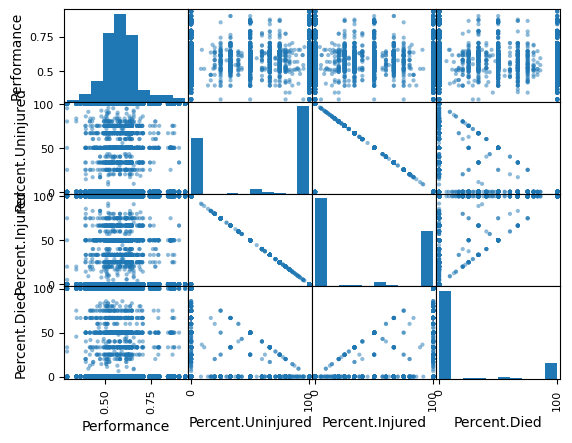

In [16]:
pd.plotting.scatter_matrix(joint[['Performance', 'Percent.Uninjured', 'Percent.Injured', 'Percent.Died']]);

In [17]:
#joint.to_csv('priv_analyzed.csv')